## 타이타닉 데이터를 활용한 데이터 분석

## 0. 라이브러리 및 데이터
## Library & Data

In [1]:
import pandas as pd #판다스 패키지 불러오기

### pd.read_csv()
 - csv파일 읽는 함수

In [2]:
# 데이터 불러오기
train = pd.read_csv("./타이타닉/train.csv")  # 모델 학습 파일
test = pd.read_csv("./타이타닉/test.csv")    # 모델 시험지 파일
submission = pd.read_csv("./타이타닉/submission.csv")    # 답안지 파일

---

## 1. Data Spread (기술통계영역)

### 1) 데이터 확인

- PassengerId : 탑승객의 고유 아이디
- Survival : 생존여부(0: 사망, 1: 생존)
- Pclass : 등실의 등급(1: 1등급, 2: 2등급, 3: 3등급)
- Name : 이름
- Sex : 성별
- Age : 나이
- Sibsp : 함께 탑승한 형제자매, 아내 남편의 수
- Parch: 함께 탑승한 부모, 자식의 수
- Ticket: 티켓번호
- Fare: 티켓의 요금
- Cabin: 객실번호
- Embarked: 배에 탑승한 위치(C = Cherbourg, Q = Queenstown, S = Southampton)

### a. 많은 데이터 중 맨 위 몇개, 맨 마지막 몇개 즉 몇개만 확인해보기
pd.DataFrame.head()
 - 데이터 프레임의 위에서 부터 n개 행을 보여주는 함수
 - n의 기본 값(default 값)은 5

In [3]:
train.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


pd.DataFrame.tail()
 - 데이터 프레임의 아래에서 부터 n개 행을 보여주는 함수
 - n의 기본 값(default 값)은 5

In [4]:
train.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


### b. 데이터프레임의 행,열 개수 확인
pd.DataFrame.shape
 - 데이터 프레임의 행의 개수와 열의 개수가 저장되어 있는 속성(attribute)

In [5]:
train.shape

(891, 12)

In [6]:
test.shape

(418, 11)

In [7]:
submission.shape

(418, 2)

### c. 데이터프레임의 column별 정보를 확인
pd.DataFrame.info()
- 데이터셋의 column별 정보를 알려주는 함수
- 비어 있지 않은 값은 (non-null)은 몇개인지?
- column의 type은 무엇인지?
 - type의 종류 : int(정수), float(실수), object(문자열), 등등 (date, ...)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### 2. 숫자형 (int, float) column들의 기술 통계량 확인
pd.DataFrame.describe()
- 숫자형 (int, float) column들의 기술 통계량을 보여주는 함수

- 기술통계량이란?
 - 해당 column을 대표할 수 있는 통계값들을 의미
 
 
- 기술통계량 종류
 - count: 해당 column에서 비어 있지 않은 값의 개수
 - mean: 평균
 - std: 표준편차
 - min: 최솟값 (이상치 포함)
 - 25% (Q1): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 1/4번째 지점에 있는 값
 - 50% (Q2): 중앙값 (전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 2/4번째 지점에 있는 값)
 - 75% (Q3): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 3/4번째 지점에 있는 값
 - max: 최댓값 (이상치 포함) 
 
 
 
- 이상치: 울타리 밖에 있는 부분을 이상치라고 정의함
   - 아래쪽 울타리: $Q_1$ - $1.5 * IQR$
   - 위쪽 울타리: $Q_3$ + $1.5 * IQR$
   - $IQR$ = $Q_3 - Q_1$
 
 
<img src="https://miro.medium.com/max/10125/1*NRlqiZGQdsIyAu0KzP7LaQ.png" width="700" height="700">

In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 3. 그럼 숫자형이 아닌 column들은 무얼 확인합니까
1) pd.Series.value_counts()
 - series 내 고유값들 각각의 개수를 보여주는 함수
 - 가장 많이 나오는 고유값들 순서로 보여줍니다.
 - 비어 있는 값은 고려하지 않습니다.

In [11]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [12]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

2. pd.Series.unique()
- 해당 series의 고유값들만 보여주는 함수
- [1, 1, 1, 3] 이라는 시리즈가 있다면, unique() 함수 적용시 [1, 3]이 출력됩니다.
- nan 값이 있을시 nan값도 포함하여 출력한다 (Not a Number)
- 출현하는 순서대로 나오기 때문에, 알파벳 순서 또는 오름차순으로 정렬되어 있지 않습니다.

In [13]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [14]:
train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

3. pd.DataFrame.groupby()
 - 집단에 대한 통계량 확인 
 
<img src="https://s3.amazonaws.com/files.dezyre.com/images/Tutorials/Split+Apply+Combine+Strategy.png" width="700" height="500">

In [15]:
%%time
train[['Pclass', 'Fare']].groupby('Pclass').mean()

CPU times: total: 0 ns
Wall time: 4.99 ms


,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [16]:
%%time
train.groupby('Pclass').mean()

CPU times: total: 0 ns
Wall time: 3.99 ms


,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


### 4. 시각화 해봅시다
1. pd.Series.plot(kind = "bar")
- 막대 그래프
- index 값이 x축, value값이 y축으로 대응 됩니다. 
- value_counts()의 결과물을 보여줄 때 유용합니다. 
- groupby된 결과물을 보여줄 때 유용합니다. 

<AxesSubplot:xlabel='Pclass'>

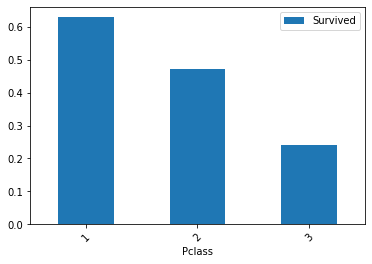

In [17]:
train[['Pclass', 'Survived']].groupby('Pclass').mean().plot(kind = "bar", rot = 45)

2. pd.Series.plot(kind = 'hist')
- 히스토그램: 구간별로 속해있는 row의 개수를 시각화 합니다.
- 수치형에서만 가능, 범주는 안됩니다!
- 보조선은 grid = True를 통해 추가 할 수 있습니다. 

<img src="http://www.statisticslectures.com/images/continuoushistogram.gif" width="700" height="300">

<AxesSubplot:ylabel='Frequency'>

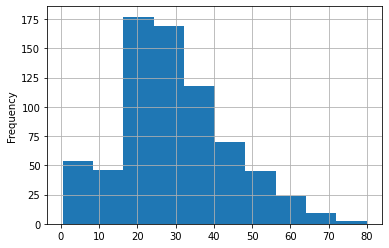

In [18]:
train['Age'].plot(kind = 'hist', bins = 10, grid = True)

3. pd.DataFrame.plot(x, y, kind = 'scatter')
- 산점도: 두 변수간의 관계를 시각화

<AxesSubplot:xlabel='Age', ylabel='Survived'>

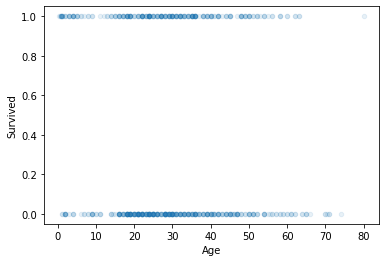

In [19]:
train.plot('Age', 'Survived', kind = 'scatter', alpha = 0.1)

4. pd.DataFrame.boxplot()
- boxplot : 사분위 지점을 빠르게 파악할 수 있고 이상치가 어느정도인지 빠르게 판단 할 수 있다

<AxesSubplot:>

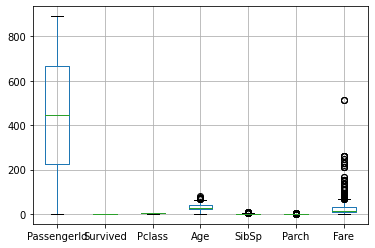

In [20]:
train.boxplot()

In [21]:
train_num = train[['Pclass','Age','SibSp','Parch','Fare']]
train_num

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500
...,...,...,...,...,...
886,2,27.0,0,0,13.0000
887,1,19.0,0,0,30.0000
888,3,NaN,1,2,23.4500
889,1,26.0,0,0,30.0000


In [22]:
# 이상치 확인을 위한 boxplot 그리기 전 초기작업
import seaborn as sns #heatmap 만들기 위한 라이브러리
import matplotlib.pyplot as plt
import warnings
import numpy as np
import matplotlib

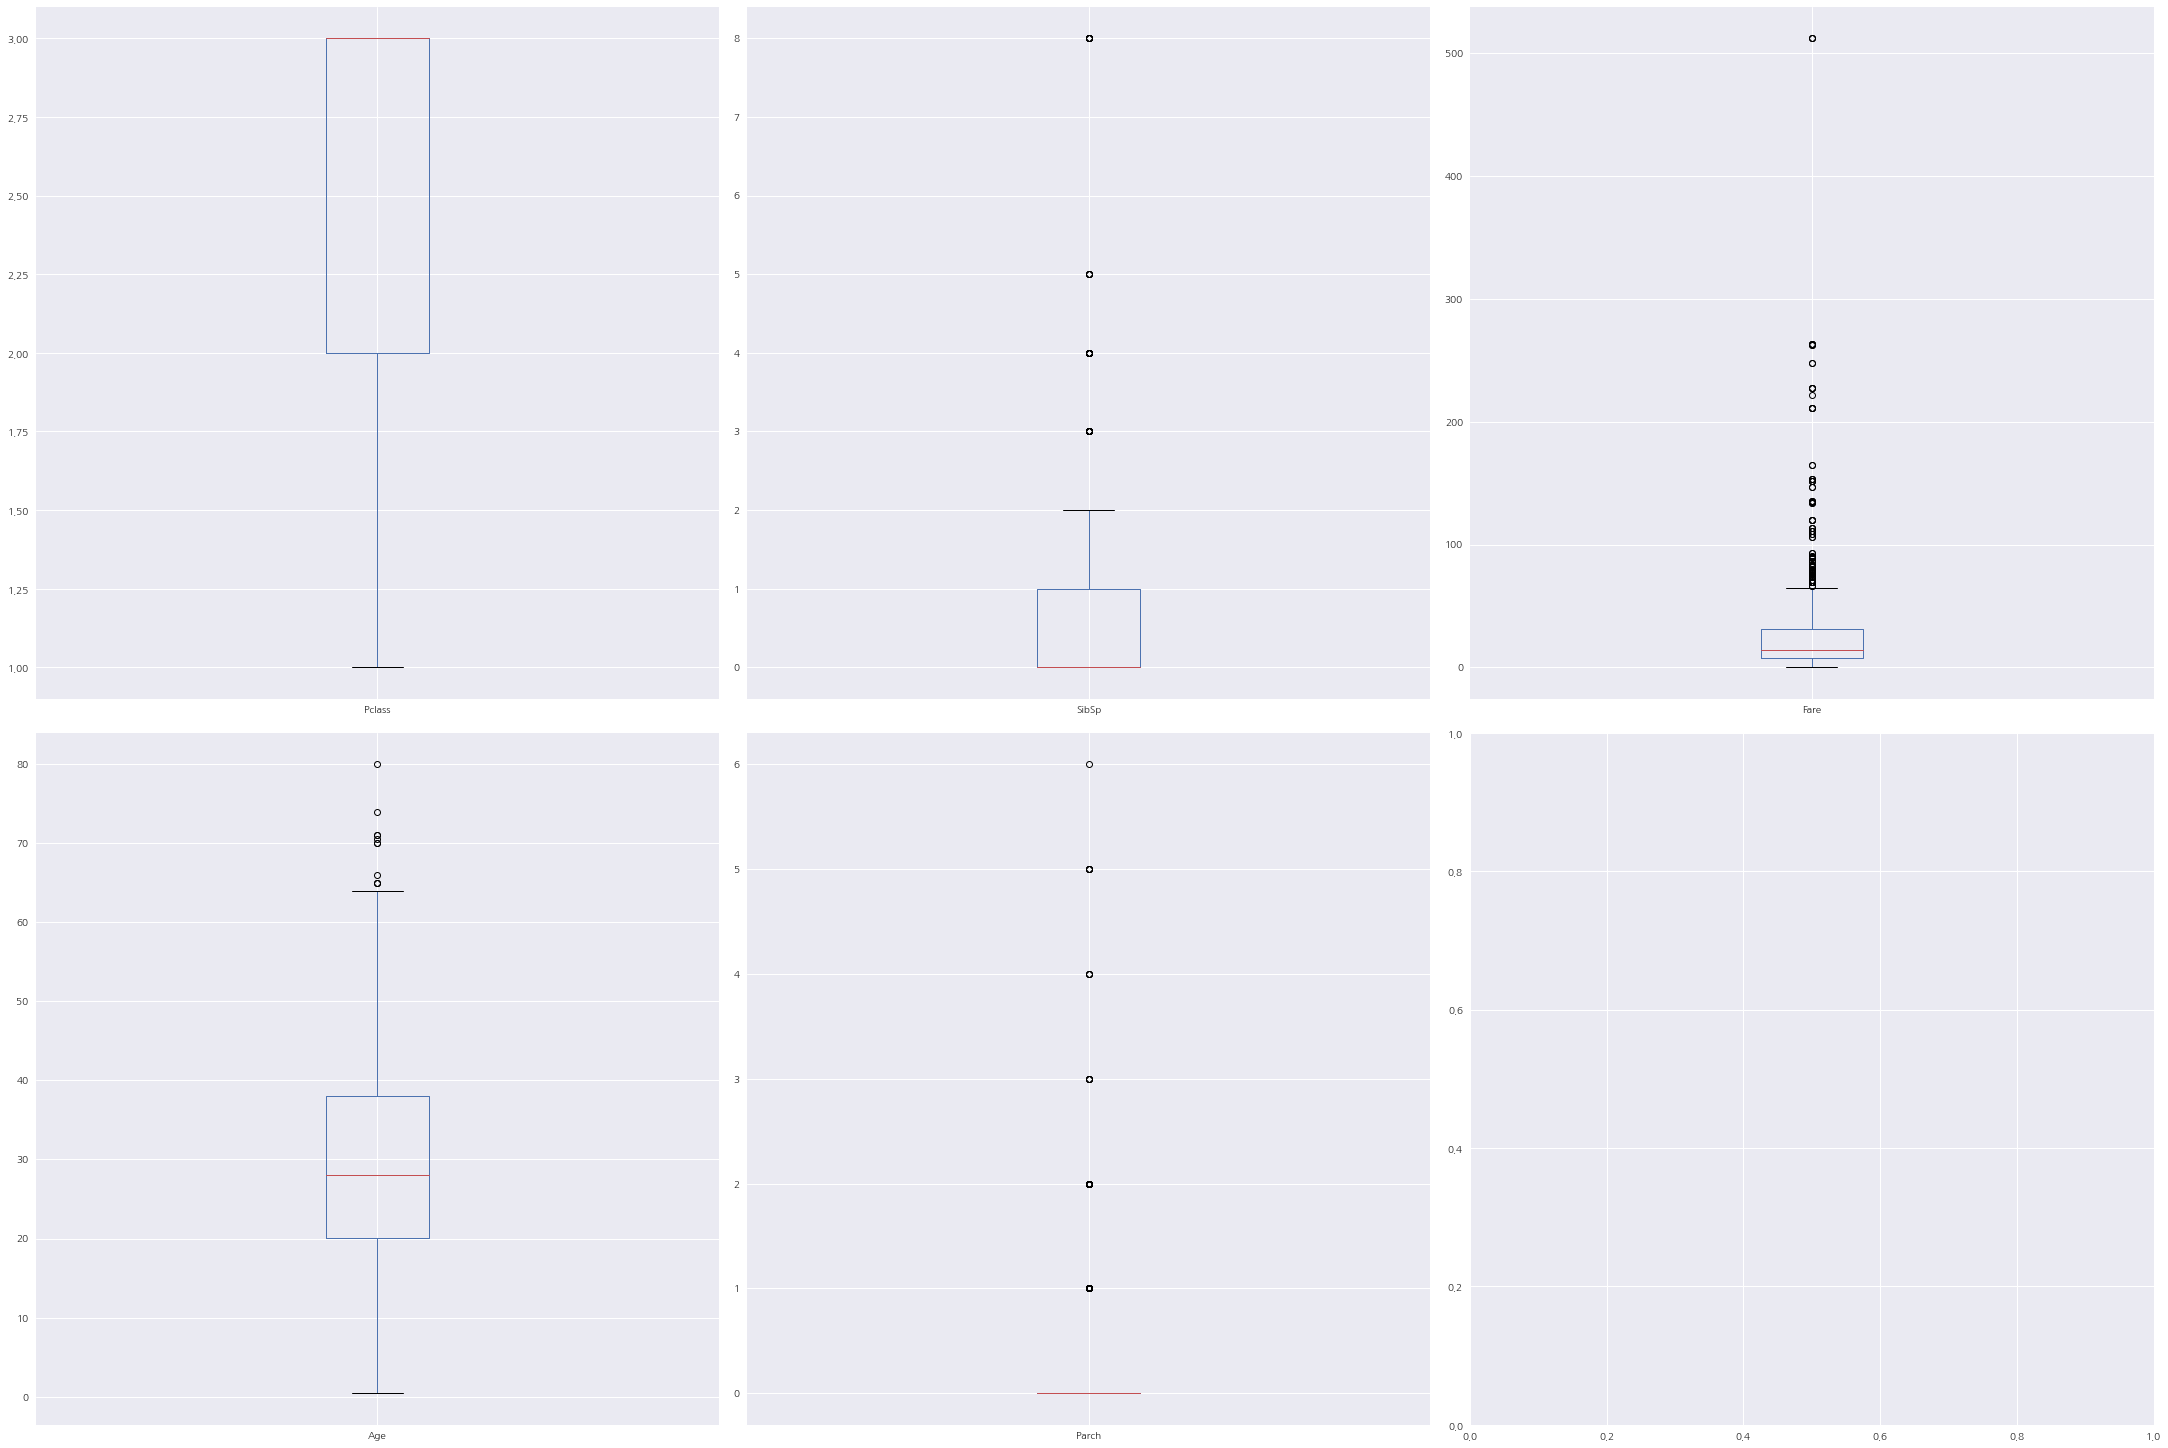

In [23]:
%matplotlib inline
plt.style.use('seaborn')
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "NanumGothic"

ncols = 3
nrows = 2

fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)

fig.set_size_inches((30, 20))

for col, ax in zip(train_num.columns, axs.T.ravel()):
    train_num[[col]].boxplot(ax=ax)
    
plt.show()

---

## 2. Data Quality (데이터 품질) 확인 후 데이터 전처리(Data Cleansing & Pre-Processing)

### 1. 결측치 확인 : pd.Series.isna() / pd.DataFrame.isna().sum()
- 결측치 여부를 확인해줍니다.
- 결측치면 True, 아니면 False
- 데이터프레임 컬럼별 결측치값의 개수를 알고싶으면 pd.DataFrame.isna().sum()

In [24]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 2. 결측치를 채우는 방법 : pd.DataFrame.fillna()
- 결측치를 채우고자 하는 column과 결측치를 대신하여 넣고자 하는 값을 명시해주어야 합니다.
- 범주형 변수일 경우, 최빈값으로 대체할 수 있습니다.
- train data
    - 결측치가 있는 Age는 age의 평균으로 채워봅시다.
    - 결측치가 있는 Embarked는 빈도수가 가장 많은 값으로 채워봅시다.
- test data
    - 결측치가 있는 Age는 age의 평균으로 채워봅시다.

In [25]:
train['Age'] = train['Age'].fillna(value = train['Age'].mean())

In [26]:
train['Age'].isna().sum()

0

In [27]:
train['Embarked'].mode()[0]

'S'

In [28]:
train['Embarked'].fillna(value = train['Embarked'].mode()[0], inplace = True)

In [29]:
train['Embarked'].isna().sum()

0

3. 무한대값 확인 : np.isinf(abs(pd.series)).sum()
- 무한대는 -무한대 / 무한대 있으므로 절댓값으로 확인
- 컬럼별 무한대 개수는 isinf().sum()

In [30]:
import numpy as np
np.isinf(abs(train['Age'])).sum()

0

4. 이상치(outlier)를 확인
5. 이상치 대체방법
- IQR을 이용한 이상치 대체 방법
    - 25%에 위치한 값을 구해줍니다.
    
    `np.quantile(Series, 0.25)`
    
    - 75%에 위치한 값을 구해줍니다.
    
    `np.quantile(Series, 0.75)`
    
    - IQR을 구해줍니다.
    - quantile_25보다 1.5 * IQR 작은 값을 구해줍니다.
    - quantile_75보다 1.5 * IQR 큰 값을 구해줍니다.
    - minimum보다 크거나 같고, maximum보다 작거나 같은 값들만 뽑아냅니다.

In [31]:
import numpy as np

In [32]:
# 25%에 위치한 값을 구해줍니다.
quantile_25 = np.quantile(train['Fare'], 0.25)

# 75%에 위치한 값을 구해줍니다.
quantile_75 = np.quantile(train['Fare'],0.75)

# IQR을 구해줍니다.
IQR = quantile_75 - quantile_25

# quantile_25보다 1.5 * IQR 작은 값을 구해줍니다.
minimum = quantile_25 - 1.5 * IQR

# quantile_75보다 1.5 * IQR 큰 값을 구해줍니다.
maximum = quantile_75 + 1.5 * IQR

# minimum보다 크거나 같고, maximum보다 작거나 같은 값들만 뽑아냅니다.
train2 = train[(minimum <= train['Fare']) & (train['Fare'] <= maximum)]

- winsorizing을 이용한 이상치 대체 방법
    - from scipy.stats.mstats import winsorize
    - train['변수명']= winsorize(train['변수명'], limits=[퍼센트/2, 퍼센트/2])

In [33]:
# boxplot에서 보이는 이상치 처리 -> 1% winsorizing 활용
from scipy.stats.mstats import winsorize
for i in range(len(train_num.columns)):
    train_num.iloc[:,i]= winsorize(train_num.iloc[:,i], limits=[0.005, 0.005])

C:\Users\user\AppData\Local\Temp\ipykernel_25672\2615372309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_num.iloc[:,i]= winsorize(train_num.iloc[:,i], limits=[0.005, 0.005])


---

## 3. Variable Relations (변수 상관성)

### a. 상관계수 및 산점도를 통한 다중공선성 확인

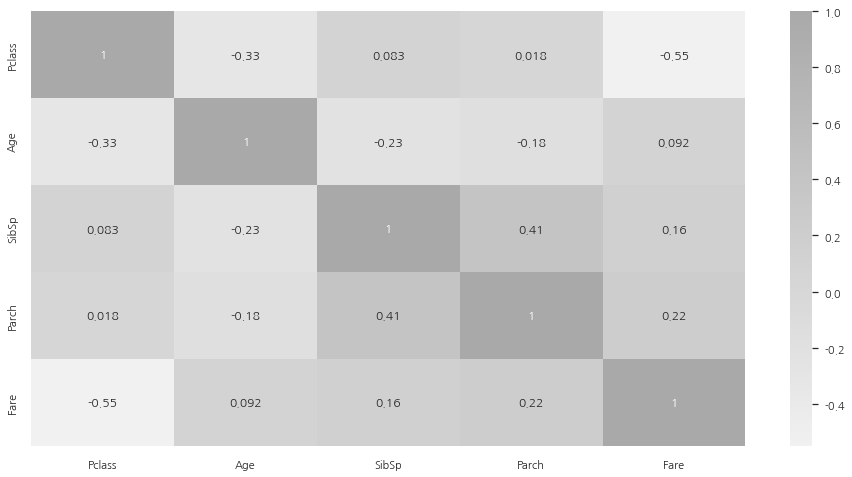

In [34]:
# 1) 독립변수, 종속변수 설정
y = train[['Survived']]
x = train[['Pclass','Age','SibSp','Parch','Fare']]

# 2)상관행렬 보기
x.corr()

# 3) 상관행렬 시각화
cmap = sns.light_palette("darkgray", as_cmap = True)
sns.set(font="NanumGothic",rc = {'figure.figsize':(16,8)})  
sns.heatmap(x.corr(), annot = True, cmap = cmap)
plt.show()

# 4) 변수끼리 산점도를 시각화
# sns.pairplot(x)
# plt.show()


### b. VIF를 통한 다중공선성 확인

In [35]:
# vif 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 출력을 위한 데이터 프레임 형성
vif = pd.DataFrame()

# VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,3.944568,Age
1,3.704638,Pclass
2,1.667827,Fare
3,1.558133,SibSp
4,1.547177,Parch


---

## 4. 변수 선택
## Feature Engineering
### 1) 로지스틱 회귀 전 정규성 검정, 독립성 검정, 등분산성 검정

a. 정규성 검정

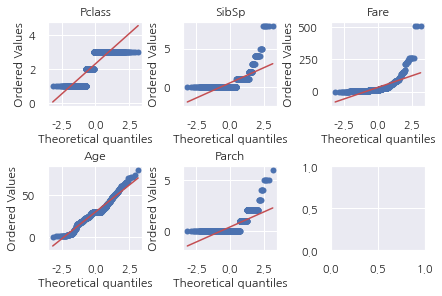

In [36]:
# 1. Q-Q plot으로 시각화
from scipy import stats

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "NanumGothic"

ncols = 3
nrows = 2

fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)
# fig.set_size_inches((50, 50))

for ax, i in zip(axs.T.ravel(), x.columns):
       stats.probplot(x[i], dist=stats.norm, plot=ax)
       ax.set_title(str(i))

plt.show()

In [37]:
# 정규성 검정을 하나의 함수로
from scipy.stats import shapiro, anderson, kstest, jarque_bera, normaltest

def normal_test(test_name,x):
    normal = []
    notnormal = []
    if test_name == 'shapiro':
        for var in x.columns :
            stat, p  = shapiro(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'anderson':
        for var in x.columns :
            result  = anderson(x[var].values,dist='norm')
            normality = 0
            for i in range(len(result.critical_values)):
                # sl, cv = result.significance_level[i], result.critical_values[i]
                if result.statistic < result.critical_values[i]:
                    normality +=1
                else :
                    normality +=0
            if normality > 2.5 :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'kstest':
        for var in x.columns :
            stat,p  = kstest(x[var].values, "norm")
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
    
    elif test_name == 'jarque_bera':
        for var in x.columns :
            stat,p  = jarque_bera(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'normaltest':
        for var in x.columns :
            stat, p  = normaltest(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
    else:
        pass
    return pd.DataFrame(normal, columns = ['normal']),pd.DataFrame(notnormal, columns = ['notnormal'])

In [38]:
# 1) shapiro
## normal
## 귀무가설을 기각하지 못했다 -> 정규분포를 따른다
## notnormal
## 귀무가설을 기각 대립가설 채택 -> data 분포가 정규분포를 따르지 않는다.
normal_s,notnormal_s = normal_test('shapiro',x)
normal_s

,normal


In [39]:
# 2) anderson test
normal_a,notnormal_a = normal_test('anderson',x)
normal_a

,normal


In [40]:
# 3) ks test
normal_ks,notnormal_ks = normal_test('kstest',x)
normal_ks

,normal


In [41]:
# 4) jarque_bera test
normal_jb,notnormal_jb = normal_test('jarque_bera',x)
normal_jb

,normal


In [42]:
# 5) normaltest
normal_n,notnormal_n = normal_test('normaltest',x)
normal_n

,normal


b. 등분산성 검정

In [43]:
x_plus_y = train[['Pclass','Age','SibSp','Parch','Fare','Survived']]

In [44]:
# H가 1인 경우 이분산성 / H가 0인 경우 등분산성
from scipy.stats import bartlett
def bartlett_test(col, p_value = 0.05, H = 1):
    list= []
    for i in col:
        T, p_val =bartlett(x_plus_y[x_plus_y['Survived']==1][i], x_plus_y[x_plus_y['Survived']==0][i]) 
        list.append([i, p_val])

    list = pd.DataFrame(list, columns = ['변수', 'p_value'])
    if H == 1:
        a = list[(list['p_value'] < p_value)][['변수', 'p_value']].sort_values('p_value')
        return a
    else:
        a = list[(list['p_value'] >= p_value)][['변수', 'p_value']].sort_values('p_value')
        return a

In [45]:
# 이분산성 변수
x_hetero = bartlett_test(x.columns, H = 1)
x_hetero

,변수,p_value
4,Fare,6.217942e-55
2,SibSp,2.829711e-30
0,Pclass,9.356542e-04
1,Age,3.835918e-02


In [46]:
# 등분산성 변수
x_homo = bartlett_test(x.columns, H = 0)
x_homo

,변수,p_value
3,Parch,0.188302


독립성 검정<br>
자료 수집 과정에서 random sampling을 했다면 잔차의 독립성은 만족하는 것으로 볼 수 있다.

### 2) 변수 선택 방법 - T-test

In [47]:
# 2) t_test
import scipy.stats as stats
def t_test(col, col_h0, col_h1, p_value = 0.05):
    list= []
    for i in col:
        if (col_h0['변수']==i).any():
            t_stat, p_val = stats.ttest_ind(x_plus_y[x_plus_y['Survived']==1][i], x_plus_y[x_plus_y['Survived']==0][i], equal_var=True, alternative='two-sided')
            list.append([i, p_val])
        elif (col_h1['변수']==i).any():
            t_stat, p_val = stats.ttest_ind(x_plus_y[x_plus_y['Survived']==1][i], x_plus_y[x_plus_y['Survived']==0][i], equal_var=False, alternative='two-sided')
            list.append([i, p_val])

    list = pd.DataFrame(list, columns = ['변수', 'p_value'])
    a = list[(list['p_value'] < p_value)][['변수', 'p_value']].sort_values('p_value')
    return a

In [48]:
# 2) t_test 결과 p_value < 0.05보다 작은 유의한 변수 가져오기
x_ttest = t_test(x.columns, x_homo, x_hetero, p_value=0.05)
x_ttest

,변수,p_value
0,Pclass,2.911155e-23
4,Fare,2.699332e-11
3,Parch,1.479925e-02
1,Age,4.189091e-02


In [49]:
# 3) t test 다른 방법
import statsmodels.api as sm

# 3-1) 상수항 추가
x_ = sm.add_constant(x, has_constant = "add")

# 3-2) 회귀모델 적합
multi_model1 = sm.Logit(x_plus_y[['Survived']], x_)
fitted_multi_model1 = multi_model1.fit()

# 3-3) 결과 출력
fitted_multi_model1.summary()

Optimization terminated successfully.
         Current function value: 0.579825
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Fri, 02 Dec 2022   Pseudo R-squ.:                  0.1293
Time:                        13:42:38   Log-Likelihood:                -516.62
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 2.513e-31
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6651      0.435      6.130      0.000       1.813       3.517
Pclass        -0.9349      0.123     -7.595      0.000      -1.176      -0.694
Age           -0.0383      0.007     -5.765      0.000      -0.051      -0.025
SibSp         -0.2390      0.089     -2.694      0.007      -0.413      -0.065
Parch          0.2181      0.103      2.121      0.034       0.017       0.420
Fare           0.0046      0.002      1.876      0.061      -0.000       0.009
==============================================================================
"""

### 3-1) 변수 선택 방법 - Forward selection

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      888
Method:                           MLE   Df Model:                            2
Date:                Fri, 02 Dec 2022   Pseudo R-squ.:                  0.1177
Time:                        13:42:39   Log-Likelihood:                -523.49
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.661e-31
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0642      0.354      8.654      0.000       2.370       3.758
Pclass        -1.0788      0.099    -10.853      0.000      -1.274      -0.884
Age           -0.0373      0.006     -5.910      0.0

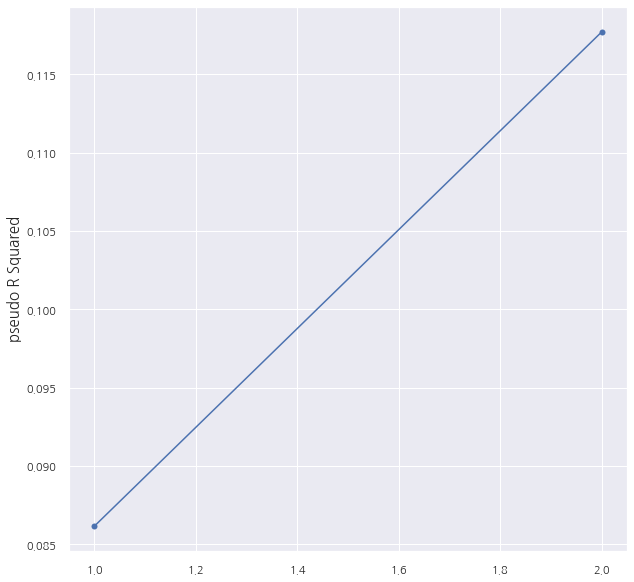

In [50]:
# 1) 전진 단계별 선택법
def forward_feature_selection(feature, target, sl_enter=.05, sl_remove=.05):
    import statsmodels.api as sm
    import pandas as pd
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings("ignore")
    
    variables = feature.columns.tolist() # 변수 설정
    forward_valriables = [] # 선택된 변수들 list 생성

    sv_per_step = [] # 각 스텝별로 선택된 변수들
    r_squared_list = [] # 각 스텝별 수정된 결정계수
    steps = [] # 스텝
    step = 0

    while len(variables) > 0:
        remainder = list(set(variables) - set(forward_valriables))
        pval = pd.Series(index=remainder) ## 변수의 p-value
        ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
        ## 선형 모형을 적합한다.
        for col in remainder: 
            X = feature[forward_valriables+[col]]
            X = sm.add_constant(X)
            model = sm.Logit(target,X).fit(disp=0) # disp=0 : 최적화 과정에서 문자열 메세지를 나타내지 않는 역할
            pval[col] = model.pvalues[col]
    
        min_pval = pval.min()
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
            forward_valriables.append(pval.idxmin())
            ## 선택된 변수들에대해서
            ## 어떤 변수를 제거할지 고른다.
            while len(forward_valriables) > 0:
                selected_X = feature[forward_valriables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.Logit(target,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                    remove_variable = selected_pval.idxmax()
                    forward_valriables.remove(remove_variable)
                else:
                    break
            
            step += 1
            steps.append(step)
            presudo_r_squared= sm.Logit(target, sm.add_constant(feature[forward_valriables])).fit(disp=0).prsquared
            r_squared_list.append(presudo_r_squared)
            sv_per_step.append(forward_valriables)
        else:
            break

    # 최종 모형 도출
    model = sm.Logit(target, sm.add_constant(x[forward_valriables])).fit(disp=0)
    print(model.summary())

    # 스텝별로 조정된 결정계수를 출력하는 표 시각화
    fig = plt.figure(figsize=(10,10))
    plt.plot(steps, r_squared_list, marker='o')
    plt.ylabel('pseudo R Squared',fontsize=15)
    plt.grid(True)
    plt.show()
    
    return model
    
forward_model = forward_feature_selection(x, x_plus_y['Survived'])

### 3-2) 변수 선택 방법 - Backward selection

Optimization terminated successfully.
         Current function value: 0.582255
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            4
Date:                Fri, 02 Dec 2022   Pseudo R-squ.:                  0.1256
Time:                        13:42:39   Log-Likelihood:                -518.79
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 3.210e-31
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1153      0.373      8.354      0.000       2.384       3.846
Pclass        -1.0795      0.

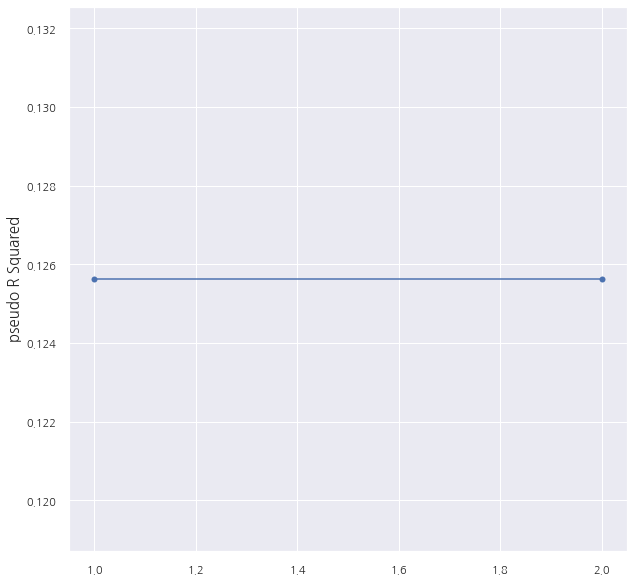

In [51]:
def backward_regression(feature, target,
                           initial_list=[], 
                           threshold_out = 0.05):
    
    import matplotlib.pyplot as plt
    import statsmodels.api as sm
    import pandas as pd
    import warnings
    warnings.filterwarnings("ignore")
    
    feature_list = feature.columns.tolist()  
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    r_squared_list = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    included = feature.columns.tolist() 
    
    while True:
        changed=False
        model = sm.Logit(target, sm.add_constant(feature[included])).fit(disp=0)
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:] # 각 feature의 P값을 의미함(절편값 빼고)
        worst_pval = pvalues.max()	# P 값이 가장 높은 것 선정
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
        
        step += 1
        steps.append(step)        
        presudo_r_squared = sm.Logit(target, sm.add_constant(feature[included])).fit(disp=0).prsquared
        r_squared_list.append(presudo_r_squared)
        sv_per_step.append(included.copy())
        if not changed:
            break
    
    # 최종모델 출력
    model = sm.Logit(target, sm.add_constant(feature[included])).fit()
    print(model.summary())

    
    fig = plt.figure(figsize=(10,10))
    plt.plot(steps, r_squared_list, marker='o')
    plt.ylabel('pseudo R Squared',fontsize=15)
    plt.grid(True)
    plt.show()

    return model

backward_model = backward_regression(x, x_plus_y['Survived'])

### 3-3) 변수 선택 방법 - Stepwise

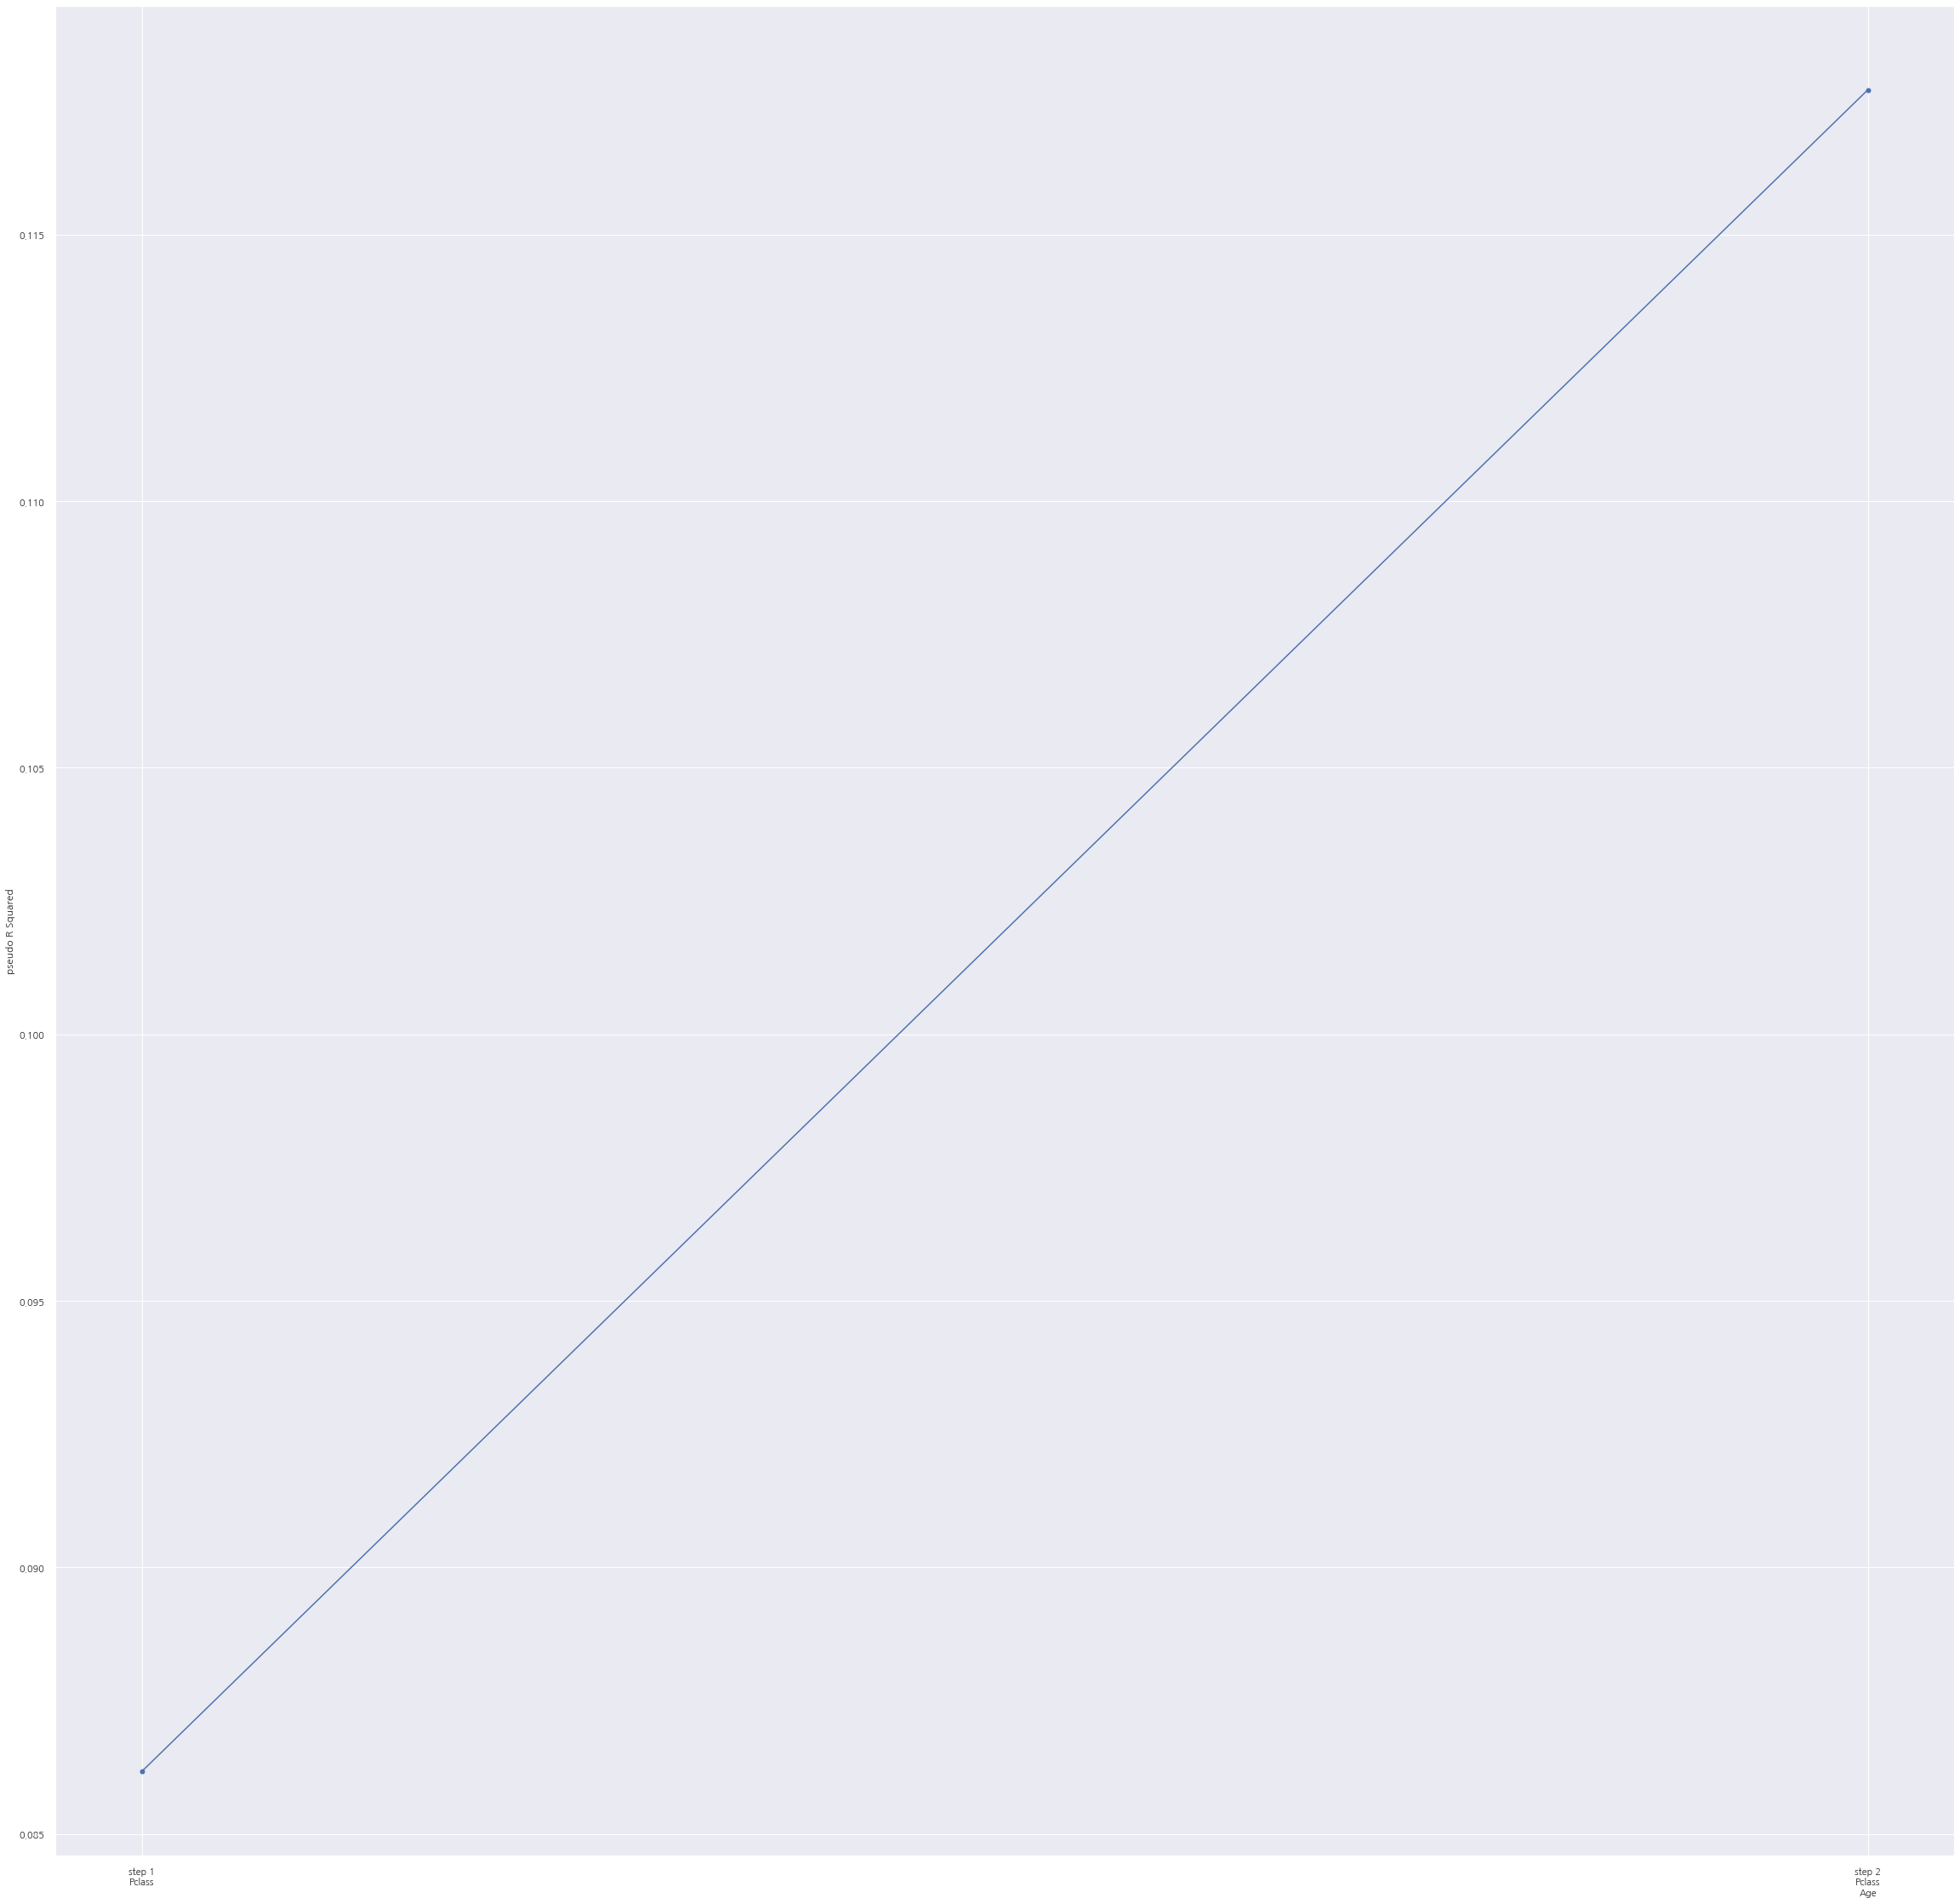

In [52]:
def stepwise_feature_selection(feature, target, variables):
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    import warnings
    import pandas as pd
    warnings.filterwarnings("ignore")
    
    y = target ## 반응 변수

    selected_variables = [] ## 선택된 변수들
    sl_enter = 0.05
    sl_remove = 0.05
    
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    r_squared = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    while len(variables) > 0:
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index=remainder) ## 변수의 p-value
        ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서
        ## 선형 모형을 적합한다.
        for col in remainder: 
            X = feature[selected_variables+[col]]
            X = sm.add_constant(X)
            model = sm.Logit(y,X).fit(disp=0)
            pval[col] = model.pvalues[col]
    
        min_pval = pval.min()
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
            selected_variables.append(pval.idxmin())
            ## 선택된 변수들에대해서
            ## 어떤 변수를 제거할지 고른다.
            while len(selected_variables) > 0:
                selected_X = feature[selected_variables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.Logit(y,selected_X).fit(disp=0).pvalues[1:]
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                    remove_variable = selected_pval.idxmax()
                    selected_variables.remove(remove_variable)
                else:
                    break
            
            step += 1
            steps.append(step)
            presudo_r_squared = sm.Logit(y,sm.add_constant(feature[selected_variables])).fit(disp=0).prsquared
            r_squared.append(presudo_r_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break

    
    # 시각화
    fig = plt.figure(figsize=(40,40))
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)])
    plt.plot(steps,r_squared, marker='o')
    plt.ylabel('pseudo R Squared')
    plt.grid(True)
    plt.show()

    return selected_variables
    
selected_variables = stepwise_feature_selection(x, x_plus_y['Survived'],x.columns.tolist())

### 4-1) 변수 선택 방법 - Lasso

In [53]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.simplefilter('ignore')

lasso_model = LogisticRegression()
param_grid = {'penalty' : ['l1'], 
                'C' : [0.001, 0.01, 0.1, 1, 2, 5, 10],
                'solver' : ['liblinear']}

grid_search = GridSearchCV(lasso_model, param_grid=param_grid, return_train_score=True, cv=5)
grid_search.fit(x, x_plus_y['Survived'])

df = pd.DataFrame(grid_search.cv_results_)
df = df.sort_values(by=['rank_test_score'], ascending=True)
df[['params', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
print('GridSearchCV 최적 파라미터:', grid_search.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_search.best_score_))

GridSearchCV 최적 파라미터: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
GridSearchCV 최고 정확도:0.6982


In [54]:
lasso_best = LogisticRegression(C=1,penalty='l1',solver='liblinear').fit(x, x_plus_y['Survived'])

df_lasso = pd.DataFrame()
df_lasso['feature'] = x.columns
df_lasso['coef'] = lasso_best.coef_[0]
df_lasso.drop(df_lasso[df_lasso['coef']==0].index, inplace=True)
df_lasso

,feature,coef
0,Pclass,-0.870818
1,Age,-0.035843
2,SibSp,-0.225637
3,Parch,0.200872
4,Fare,0.005349


In [55]:
# 라쏘에서 선택된 피처
lasso_features = df_lasso['feature'].values.tolist()
print('Lasso에서 선택된 피처 수 {0:1.0f}'.format(len(df_lasso)), '개')
lasso_features

Lasso에서 선택된 피처 수 5 개


['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

### 4-2) 변수 선택 방법 - Ridge

In [56]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.simplefilter('ignore')

ridge_model = LogisticRegression()
param_grid = {'penalty' : ['l2'], 
                'C' : [0.001, 0.01, 0.1, 1, 2, 5, 10],
                'solver' : ['liblinear']}

grid_search = GridSearchCV(ridge_model, param_grid=param_grid, return_train_score=True, cv=5)
grid_search.fit(x, x_plus_y['Survived'])

df = pd.DataFrame(grid_search.cv_results_)
df = df.sort_values(by=['rank_test_score'], ascending=True)
df[['params', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
print('GridSearchCV 최적 파라미터:', grid_search.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_search.best_score_))

GridSearchCV 최적 파라미터: {'C': 2, 'penalty': 'l2', 'solver': 'liblinear'}
GridSearchCV 최고 정확도:0.7026


In [57]:
ridge_best = LogisticRegression(C=2,penalty='l2',solver='liblinear').fit(x, x_plus_y['Survived'])

df_ridge = pd.DataFrame()
df_ridge['feature'] = x.columns
df_ridge['coef'] = ridge_best.coef_[0]
df_ridge.drop(df_ridge[df_ridge['coef']==0].index, inplace=True)
df_ridge

,feature,coef
0,Pclass,-0.870837
1,Age,-0.035718
2,SibSp,-0.234063
3,Parch,0.213345
4,Fare,0.005358


In [58]:
# 릿지에서 선택된 피처
ridge_features = df_ridge['feature'].values.tolist()
print('Ridge에서 선택된 피처 수 {0:1.0f}'.format(len(df_ridge)), '개')
ridge_features

Ridge에서 선택된 피처 수 5 개


['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

### 4-3) 변수 선택 방법 - Elastic Net

In [59]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.simplefilter('ignore')

elastic_model = LogisticRegression()
param_grid = {'penalty' : ['elasticnet'], 
                'C' : [0.001, 0.01, 0.1, 1, 2, 5, 10],
                'solver' : ['saga'],
                'l1_ratio' : [0.2, 0.5, 0.8]}

grid_search = GridSearchCV(elastic_model, param_grid=param_grid, return_train_score=True, cv=5)
grid_search.fit(x, x_plus_y['Survived'])

df = pd.DataFrame(grid_search.cv_results_)
df = df.sort_values(by=['rank_test_score'], ascending=True)
df[['params', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
print('GridSearchCV 최적 파라미터:', grid_search.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_search.best_score_))

GridSearchCV 최적 파라미터: {'C': 1, 'l1_ratio': 0.2, 'penalty': 'elasticnet', 'solver': 'saga'}
GridSearchCV 최고 정확도:0.6836


In [60]:
elastic_best = LogisticRegression(C=1,penalty='elasticnet',solver='saga',l1_ratio=0.2).fit(x, x_plus_y['Survived'])

df_elastic = pd.DataFrame()
df_elastic['feature'] = x.columns
df_elastic['coef'] = elastic_best.coef_[0]
df_elastic.drop(df_elastic[df_elastic['coef']==0].index, inplace=True)
df_elastic

,feature,coef
0,Pclass,-0.073676
1,Age,-0.024230
2,SibSp,-0.045480
3,Parch,-0.004977
4,Fare,0.015166


In [61]:
# 릿지에서 선택된 피처
elastic_features = df_elastic['feature'].values.tolist()
print('Elastic에서 선택된 피처 수 {0:1.0f}'.format(len(df_elastic)), '개')
elastic_features

Elastic에서 선택된 피처 수 5 개


['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

---

# 5. Modeling

### 5-1) sklearn.linear_model.LogisticRegression()
- 로지스틱 회귀 모형
- 0과 1사이의 값을 산출

### 추가 옵션
X_train, y_train, X_test 설정<br>
X_train : train df에서 'Pclass','Age','SibSp','Parch','Fare'컬럼<br>
y_train : train df에서 'Survived'<br>
X_test : test df에서 'Pclass','Age','SibSp','Parch','Fare'컬럼<br>
X_test의 na값은 그 모델에서 고려하지 않게 해주기 위하여 0값으로 설정

In [62]:
X_train = train[['Pclass','Age','SibSp','Parch','Fare']]
y_train = train['Survived']
X_test = test[['Pclass','Age','SibSp','Parch','Fare']]

In [103]:
X_test = X_test.fillna(0)

In [64]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

## 6. 모델 학습 및 검증
## Model Tuning & Evaluation

### model.fit()
- 모델 학습

In [65]:
model.fit(X_train, y_train)

LogisticRegression()

### model.predict()
- 모델 예측
- 예측값을 test['Survived']로 놓기

In [66]:
y_pred = model.predict(X_test)

In [67]:
test['Survived'] = y_pred

### model.predict_proba()
- 모델 예측확률

In [68]:
model.predict_proba(X_test)[:,1]

array([0.19517944, 0.10590463, 0.17755665, 0.24462788, 0.28014317,
       0.34743099, 0.2233062 , 0.47616919, 0.3117382 , 0.21420051,
       0.47396883, 0.51852467, 0.72712799, 0.15053503, 0.49167187,
       0.4405605 , 0.37909778, 0.28779308, 0.20291295, 0.13956158,
       0.41434013, 0.43644502, 0.86422016, 0.80332232, 0.82182095,
       0.09871361, 0.797706  , 0.27624249, 0.57095925, 0.3745218 ,
       0.22513781, 0.38744667, 0.24803239, 0.5398385 , 0.6449515 ,
       0.30767267, 0.47415222, 0.28920054, 0.25972275, 0.53185668,
       0.20623978, 0.86132124, 0.15924987, 0.4255305 , 0.50040782,
       0.25828093, 0.53240827, 0.47379544, 0.44560322, 0.26730527,
       0.6975916 , 0.45603619, 0.46679658, 0.83265169, 0.7012388 ,
       0.24626674, 0.19225882, 0.25802972, 0.42499969, 0.82948213,
       0.32064871, 0.40762485, 0.31227145, 0.28054184, 0.91753066,
       0.70662754, 0.31240382, 0.52855034, 0.65852818, 0.78393858,
       0.26547103, 0.28844935, 0.23022209, 0.67872768, 0.79856

### pd.DataFrame.to_csv()
 - csv파일 저장하는 함수
 - y_pred값을 포함한 test 파일 csv로 저장

In [69]:
test.to_csv('lr_model.csv', index = False)

## 7. 모델 성능평가
- test값의 실제 y값이 없기 때문에
- train 데이터를 통해 y를 예측 하고 그 값을 train의 실제 y값과 비교하고자 한다.

In [70]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [71]:
X_train = train[['Pclass','Age','SibSp','Parch','Fare']]
y_train = train['Survived']
X_test = test[['Pclass','Age','SibSp','Parch','Fare']]

In [72]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

In [73]:
y_true = y_train.values

In [74]:
cf_matrix = confusion_matrix(y_true, y_pred)
cf_matrix

array([[474,  75],
       [188, 154]], dtype=int64)

In [75]:
accuracy_score(y_true, y_pred)

0.7048260381593715

In [76]:
(cf_matrix[0,0] + cf_matrix[1,1]) / 891

0.7048260381593715

In [77]:
precision_score(y_true, y_pred)

0.6724890829694323

In [78]:
(cf_matrix[1,1]) / (83 + 160)

0.6337448559670782

In [79]:
recall_score(y_true, y_pred)

0.4502923976608187

In [80]:
(cf_matrix[1,1]) / (182 + 160)

0.4502923976608187

In [81]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.86      0.78       549
           1       0.67      0.45      0.54       342

    accuracy                           0.70       891
   macro avg       0.69      0.66      0.66       891
weighted avg       0.70      0.70      0.69       891



In [82]:
roc_auc_score(y_true, y_pred)

0.6568401879014475

# 8. DT 실습

In [83]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)

## 8-1. 모델 학습 및 검증
## Model Tuning & Evaluation

### model.fit()
- 모델 학습

In [84]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

### export_graphviz와 graphviz로 시각화
- out_file : 'tree.dot'
- class_names : ["0", "1"]
- feature_names : X_train의 columns명
- impurity=True, filled=True

In [135]:
from sklearn.tree import export_graphviz
import graphviz
def DT_vis(X_train, best_model):
    export_graphviz(best_model, out_file='tree.dot', class_names=["0", "1"], feature_names= X_train.columns, impurity=True, filled=True)

    with open('tree.dot', encoding='utf-8') as f:
        dot_graph = f.read()
    return graphviz.Source(dot_graph)

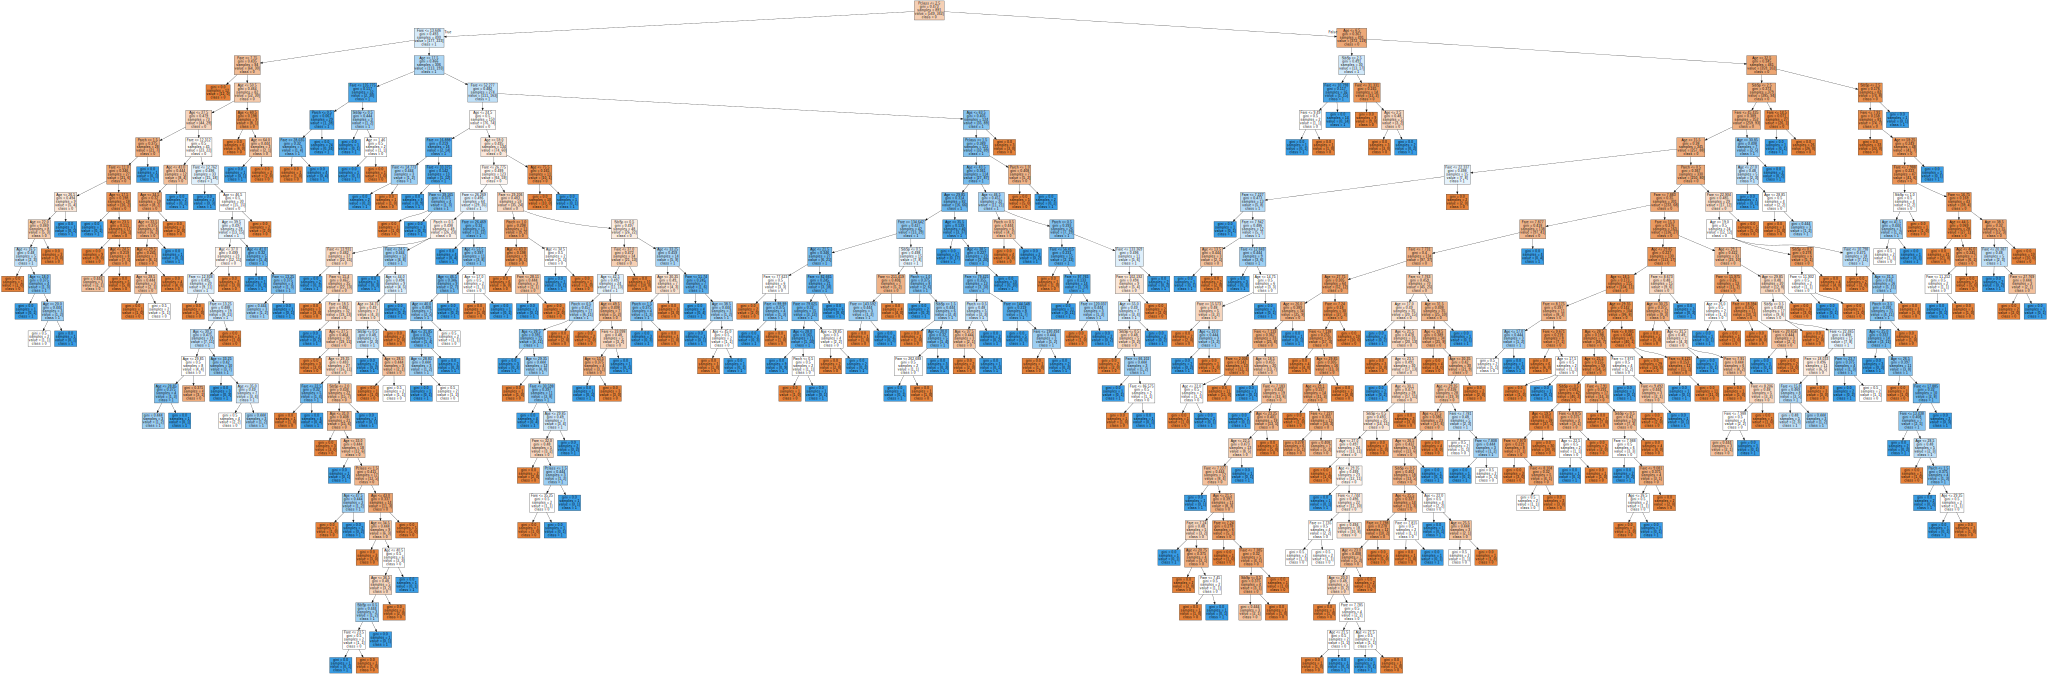

In [92]:
DT_vis(X_train,tree)

### model.predict()
- 모델 예측
- 예측값을 test['Survived']로 놓기

In [104]:
y_pred = tree.predict(X_test)

In [105]:
test['Survived'] = y_pred

### model.predict_proba()
- 모델 예측확률

In [131]:
tree.predict_proba(X_test)[:,1]

array([0.        , 0.        , 1.        , 1.        , 1.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 1.        , 1.        , 1.        , 1.        ,
       0.        , 1.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.25      , 0.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       1.        , 0.        , 1.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 1.        ,
       0.5       , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 1.     

### pd.DataFrame.to_csv()
 - csv파일 저장하는 함수
 - y_pred값을 포함한 test 파일 csv로 저장

In [107]:
test.to_csv('dt_model.csv', index = False)

## 8-2. 모델 성능평가
- test값의 실제 y값이 없기 때문에
- train 데이터를 통해 y를 예측 하고 그 값을 train의 실제 y값과 비교하고자 한다.

In [108]:
from sklearn.metrics import accuracy_score, recall_score, precision_score , f1_score, roc_auc_score, confusion_matrix

# 2) confusion matrix 만드는 함수
def score(y_test, pred):
    # score print
    print('accuracy score : {0:.3f}'.format(accuracy_score(y_test, pred)))
    print('precision score : {0:.3f}'.format(precision_score(y_test, pred)))
    print('recall score : {0:.3f}'.format(recall_score(y_test, pred)))
    print('f1 score : {0:.3f}'.format(f1_score(y_test, pred)))
    print('roc score : {0:.3f}'.format(roc_auc_score(y_test, pred)))
    # confusion matirx 함수
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, annot_kws={"size": 20}, cmap='Blues', fmt='g')
    plt.xlabel('Predicted', fontsize=20)
    plt.ylabel('Actual', fontsize=20)

In [111]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_train)
y_true = y_train.values

accuracy score : 0.705
precision score : 0.672
recall score : 0.450
f1 score : 0.539
roc score : 0.657


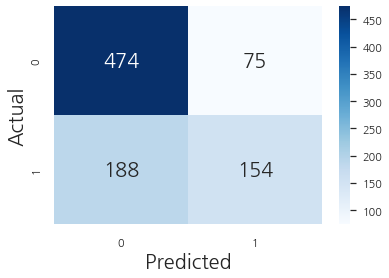

In [112]:
score(y_true,y_pred)

In [115]:
from sklearn.preprocessing import Binarizer

# 3) thresholds를 무엇으로 하는가에 따라 score 산출하는 함수
def get_f1_score(y_test, pred_proba_1):

    thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    accuracys = []
    precisions = []
    recalls = []
    f1_scores = []
    auc_scores=[]

    for threshold in thresholds:
        binarizer = Binarizer(threshold = threshold) # threshold 아래는 0 / 위는 1
        pred_proba = binarizer.fit_transform(pred_proba_1)

        accuracy = accuracy_score(y_test, pred_proba)
        precision = precision_score(y_test, pred_proba)
        recall = recall_score(y_test, pred_proba)
        f1score = f1_score(y_test, pred_proba)
        auc_score=roc_auc_score(y_test, pred_proba)

        accuracys.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1score)
        auc_scores.append(auc_score)
        
    results = pd.DataFrame(data = {"Accuracy": accuracys, "Precision": precisions, "Recall": recalls, "F1 score": f1_scores,"Auc_Score":auc_scores}, index = thresholds)
    print(results)

In [116]:
tree.predict_proba(X_test)

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.

In [120]:
pred = pd.DataFrame(tree.predict(X_train))
pred_probability = pd.DataFrame(tree.predict_proba(X_train))

In [121]:
prediction = pd.concat([pred_probability, pred], axis = 1)
prediction.columns = ["Negative(0)", "Positive(1)", "y_pred"]
pred_proba_1 = np.array(prediction["Positive(1)"]).reshape(-1, 1)
print(get_f1_score(y_train, pred_proba_1))

     Accuracy  Precision    Recall  F1 score  Auc_Score
0.1  0.941639   0.868020  1.000000  0.929348   0.952641
0.2  0.946128   0.878866  0.997076  0.934247   0.955733
0.3  0.951740   0.896552  0.988304  0.940195   0.958633
0.4  0.955107   0.910326  0.979532  0.943662   0.959711
0.5  0.957351   0.977987  0.909357  0.942424   0.948303
0.6  0.956229   0.984026  0.900585  0.940458   0.945739
0.7  0.950617   1.000000  0.871345  0.931250   0.935673
0.8  0.950617   1.000000  0.871345  0.931250   0.935673
0.9  0.950617   1.000000  0.871345  0.931250   0.935673
None


# 9. SV 실습
- estimators 은 lr과 dt 일단 2개로 진행하겠습니다.
- estimators=['alias',모델 이름] 형태로 입력하시면 됩니다.

In [126]:
from sklearn.ensemble import VotingClassifier
estimators = [('lr', model),
              ('dt', tree)]
SV = VotingClassifier(estimators, voting="soft",n_jobs=-1)

## 9-1. 모델 학습 및 검증
## Model Tuning & Evaluation

### model.fit()
- 모델 학습

In [127]:
SV.fit(X_train, y_train)

VotingClassifier(estimators=[['lr', LogisticRegression()],
                             ['dt', DecisionTreeClassifier()]],
                 n_jobs=-1, voting='soft')

### model.predict()
- 모델 예측
- 예측값을 test['Survived']로 놓기

In [129]:
y_pred = SV.predict(X_test)

In [130]:
test['Survived'] = y_pred

### model.predict_proba()
- 모델 예측확률

In [132]:
SV.predict_proba(X_test)[:,1]

array([0.09758972, 0.05295231, 0.58877832, 0.62231394, 0.64007158,
       0.6737155 , 0.1116531 , 0.2380846 , 0.6558691 , 0.10710026,
       0.73698442, 0.75926234, 0.86356399, 0.07526751, 0.74583594,
       0.72028025, 0.68954889, 0.64389654, 0.60145647, 0.06978079,
       0.70717006, 0.71822251, 0.93211008, 0.40166116, 0.91091048,
       0.04935681, 0.898853  , 0.63812125, 0.78547962, 0.6872609 ,
       0.1125689 , 0.69372334, 0.1240162 , 0.76991925, 0.82247575,
       0.65383633, 0.73707611, 0.14460027, 0.12986138, 0.76592834,
       0.10311989, 0.43066062, 0.07962494, 0.33776525, 0.25020391,
       0.12914046, 0.26620414, 0.73689772, 0.72280161, 0.13365264,
       0.8487958 , 0.2280181 , 0.73339829, 0.91632584, 0.3506194 ,
       0.12313337, 0.09612941, 0.12901486, 0.71249984, 0.91474107,
       0.41032436, 0.20381242, 0.15613572, 0.14027092, 0.45876533,
       0.35331377, 0.65620191, 0.26427517, 0.32926409, 0.89196929,
       0.13273552, 0.14422468, 0.61511105, 0.33936384, 0.89928

## 9-2. 모델 성능평가
- test값의 실제 y값이 없기 때문에
- train 데이터를 통해 y를 예측 하고 그 값을 train의 실제 y값과 비교하고자 한다.

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score , f1_score, roc_auc_score, confusion_matrix

# 2) confusion matrix 만드는 함수
def score(y_test, pred):
    # score print
    print('accuracy score : {0:.3f}'.format(accuracy_score(y_test, pred)))
    print('precision score : {0:.3f}'.format(precision_score(y_test, pred)))
    print('recall score : {0:.3f}'.format(recall_score(y_test, pred)))
    print('f1 score : {0:.3f}'.format(f1_score(y_test, pred)))
    print('roc score : {0:.3f}'.format(roc_auc_score(y_test, pred)))
    # confusion matirx 함수
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, annot_kws={"size": 20}, cmap='Blues', fmt='g')
    plt.xlabel('Predicted', fontsize=20)
    plt.ylabel('Actual', fontsize=20)

accuracy score : 0.953
precision score : 0.984
recall score : 0.892
f1 score : 0.936
roc score : 0.941


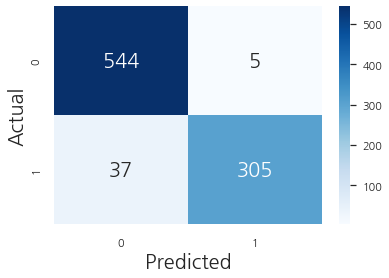

In [133]:
SV.fit(X_train, y_train)
y_pred = SV.predict(X_train)
y_true = y_train.values
score(y_true,y_pred)

In [ ]:
from sklearn.preprocessing import Binarizer

# 3) thresholds를 무엇으로 하는가에 따라 score 산출하는 함수
def get_f1_score(y_test, pred_proba_1):

    thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    accuracys = []
    precisions = []
    recalls = []
    f1_scores = []
    auc_scores=[]

    for threshold in thresholds:
        binarizer = Binarizer(threshold = threshold) # threshold 아래는 0 / 위는 1
        pred_proba = binarizer.fit_transform(pred_proba_1)

        accuracy = accuracy_score(y_test, pred_proba)
        precision = precision_score(y_test, pred_proba)
        recall = recall_score(y_test, pred_proba)
        f1score = f1_score(y_test, pred_proba)
        auc_score=roc_auc_score(y_test, pred_proba)

        accuracys.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1score)
        auc_scores.append(auc_score)
        
    results = pd.DataFrame(data = {"Accuracy": accuracys, "Precision": precisions, "Recall": recalls, "F1 score": f1_scores,"Auc_Score":auc_scores}, index = thresholds)
    print(results)

In [136]:
pred = pd.DataFrame(SV.predict(X_train))
pred_probability = pd.DataFrame(SV.predict_proba(X_train))

In [137]:
prediction = pd.concat([pred_probability, pred], axis = 1)
prediction.columns = ["Negative(0)", "Positive(1)", "y_pred"]
pred_proba_1 = np.array(prediction["Positive(1)"]).reshape(-1, 1)
print(get_f1_score(y_train, pred_proba_1))

     Accuracy  Precision    Recall  F1 score  Auc_Score
0.1  0.479237   0.424318  1.000000  0.595819   0.577413
0.2  0.811448   0.671260  0.997076  0.802353   0.846443
0.3  0.905724   0.808612  0.988304  0.889474   0.921292
0.4  0.945006   0.927114  0.929825  0.928467   0.942144
0.5  0.952862   0.983871  0.891813  0.935583   0.941353
0.6  0.940516   1.000000  0.845029  0.916006   0.922515
0.7  0.837262   1.000000  0.576023  0.730983   0.788012
0.8  0.748597   1.000000  0.345029  0.513043   0.672515
0.9  0.641975   1.000000  0.067251  0.126027   0.533626
None
